# Overview

### Project: Analysis and prediction model on Credit Card Customers Churn Rate

### Summary: RandomForestClassifier - 95.51% accuracy & 75.69% recall

**Credit:**This project is credited to the dataset available on Kaggle by user [Sakshi Goyal](https://www.kaggle.com/sakshigoyal7/credit-card-customers) titled Credit Card Customers. Work is done with reference to many other greater codes uploaded by other kaggle users. <br>
**Author:** [Nicky (Kaggle)](https://www.kaggle.com/nickyng) | [ahjimomo (GitHub)](https://github.com/ahjimomo) <br>
**Background:** Project is build on for the submission of school's module of TIC3901 - Industrial Practice from the [National University of Singapore (NUS)](https://www.nus.edu.sg/) for AY 2021/22 Semester 2

# Table Of Contents
* [01 Task and Introduction](#Task-And-Introduction)
* [02 Data Exploration and Imports](#Data-Exploration-and-Imports)
    - [2A Feature Description Table](#Feature-Description)
    - [2B Target](#Target)
* [03 Data Visualization](#Data-Visualization)
* [04 Data Preparation](#Data-Preparation)
    - [4A Data Discretization](#Data-Discretization)
    - [4B Data Conversion](#Data-Conversion)
    - [4C Feature Encoding](#Feature-Encoding)
    - [4D Train-Test Data Split](#Train-Test-Split)
* [4 Random Forest Classifier](#Random-Forest)
    - [4A RFC Model Evaluation](#RFC-Model-Evaluation) 
* [5 Conclusion](#Conclusion)

<a id="Task-And-Introduction"></a>
# 01 Task and Introduction

<h1 style="color:#323232;font-size:60px;font-family:Georgia;text-align:center;"><strong>What is Churn?</h1>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#323232;"><br>
Customer churn or customer attrition is the phenomenon where customers of a business no longer purchase or interact with the business. A high churn means that higher number of customers no longer want to purchase goods and services from the business.<br>
Therefore, churn analysis is an important metrics to inform the organisation of any red flags on customers leaving, what makes a customer stay loyal or issues that is causing customers to leave the organisation.<br>
    <br></p>
    
<h1 style="color:#323232;font-size:60px;font-family:Georgia;text-align:center;"><strong>How is the customer's churn rate calculated?</h1>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#323232;"><br>
    <b>Customer Churn Rate = No. of churned customers / Total No. of customers x 100</b><br>
    * This is usually calculated over a specified period of time<br>
    <br></p>
    
<h1 style="color:#323232;font-size:60px;font-family:Georgia;text-align:center;"><bg>Objectives</b></h1>
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#323232;"><br>
    For this project, we will be doing an exploratory data analysis (EDA) on the dataset and generate a model that predicts customers that will churn based on the features within the dataset. <br>
    While there are many Machine Learning techinques available, we will be focusing on the Random Forest Classifer available from the SKLearn library.<br>
    <br></p>

<a id="Data-Exploration-and-Imports"></a>
## 02 Data Exploration & Imports

In [1]:
# Libraries

#%% Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
from IPython.display import display 
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score

In [2]:
# Importing dataset

raw = pd.read_csv("01_Raw_Data/BankChurners.csv")

In [3]:
# Review data's attributes and data types - df.info()

raw.info() # 10,127 rows & 23 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [4]:
raw.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [5]:
# Removing Naive_Bayes_Classifier_Attrition_Flag - column 21 & 22

df = raw.loc[:, :"Avg_Utilization_Ratio"]

In [6]:
# Review dataset's basic overview of numeric attributes

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [7]:
# Review dataset's basic overview of categorical attributes

df.describe(include = "O").transpose()

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


In [8]:
# Check if there is any null values

df.isna().sum() # No NAs in dataset

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
# Basic checks if data has been cleaned prior - Education Level

df["Education_Level"].value_counts() # 1519 unknowns

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [10]:
# Basic checks if data has been cleaned prior - Marital_Status

df["Marital_Status"].value_counts() # 749 unknown

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [11]:
# Basic checks if data has been cleaned prior - Income_Category

df["Income_Category"].value_counts() # 1112 unknown

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [12]:
# Basic checks if data has been cleaned prior - Card_Category

df["Card_Category"].value_counts() # All known - 20 Platinum, might not be useful

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [13]:
# Basic checks if data has been cleaned prior - CLIENTNUM

(df["CLIENTNUM"] == "unknown").count() # All known - 20 Platinum, might not be useful

10127

In [14]:
# Checking for duplicate records

df[df.duplicated()]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


<a id="Feature-Description"></a>
## 2A Feature Description Table
From the above exploration and basic cleaning, we now have the dataset in the following description table for us to work with:

| Data | Description |
| :-- | :-- |
| CLIENTNUM | Primary Key: Client number. Unique identifier for the customer |
| Customer_Age | Demographic: Customer's Age in year |
| Gender | Demographic: Gender of customer (M = Male, F = Female) |
| Dependent_count | Demographic: Number of dependents of customer |
| Education_Level | Demographic: Customer's education level (High School, Doctorate, Post-Gradudate, Uneducated, Unknown, College) |
| Marital_Status | Demographic: (Married, Single, Divorced, Unknown) |
| Income_Category | Demographic: Annual Income Category of the account holder |
| Card_Category | Product: Type of Card (Blue, Silver, Gold, Platinum) |
| Months_on_book | Duration of customer with bank, number of months |
| Total_Relationship_Count | Number of products held by the customer |
| Months_Inactive_12_mon | No. of months inactive in the last 12 months | 
| Contacts_Count_12_mon | No. of months that customer has at least 1 transaction |
| Credit_Limit | Total Credit Limit on the Credit Card ($) |
| Total_Revolving_Bal | Total Revolving balance on credit cards ($) |
| Avg_Open_To_Buy | Average amount spent ($) |
| Total_Amt_Chng_Q4_Q1 | Change in Transaction Amount (Q4 over Q1) |
| Total_Trans_Amt | Total Transaction Amount (Last 12 months) |
| Total_Trans_Ct | Total Transaction Count (Last 12 months) |
| Total_Ct_Chng_Q4_Q1 | Change in Transaction Count (Q4 over Q1) |
| Avg_Utilization_Ratio | Average Card Utilization rate |

<a id="Target-Attribute"></a>
## 2B Target Attribute
| Data | Description |
| :-- | :-- |
| Attrition_Flag | Event: If account is active (1: Attrited Customer, 0: Existing Customer) |

<a id="Data-Visualisation"></a>
# 03 Data Visualisation


<Figure size 432x288 with 0 Axes>

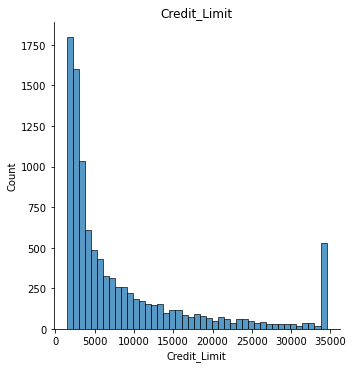

<Figure size 432x288 with 0 Axes>

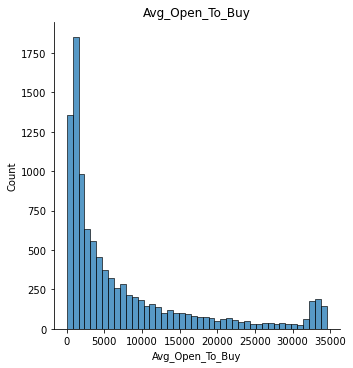

<Figure size 432x288 with 0 Axes>

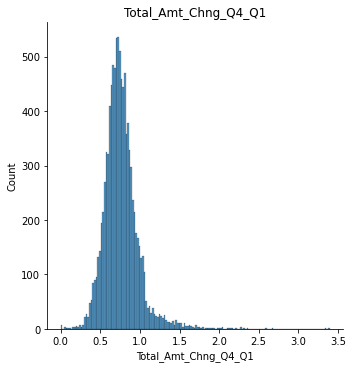

<Figure size 432x288 with 0 Axes>

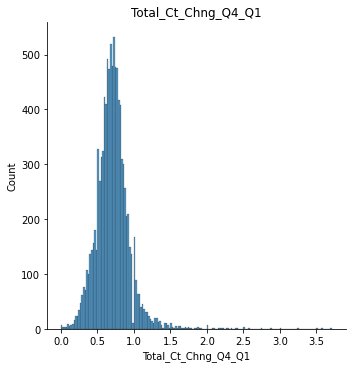

<Figure size 432x288 with 0 Axes>

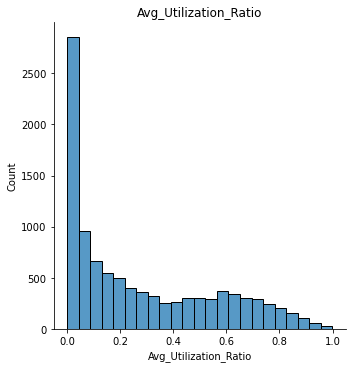

In [15]:
# Plotting continous features 
continous_features = df.select_dtypes(['float64']).columns.to_list()

for cont_feature in continous_features: 
    plt.figure()
    ax = sns.displot(df[cont_feature])
    plt.title(cont_feature)

<Figure size 432x288 with 0 Axes>

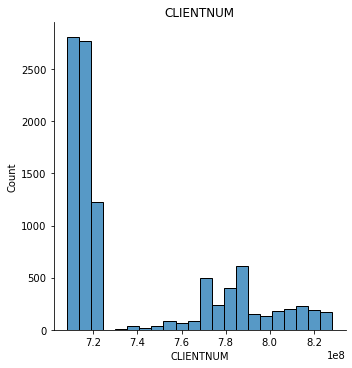

<Figure size 432x288 with 0 Axes>

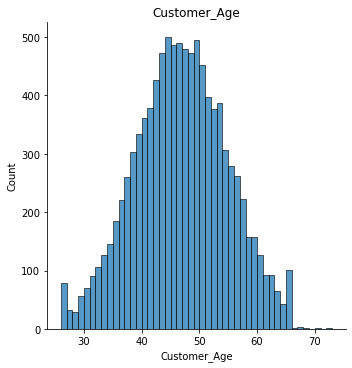

<Figure size 432x288 with 0 Axes>

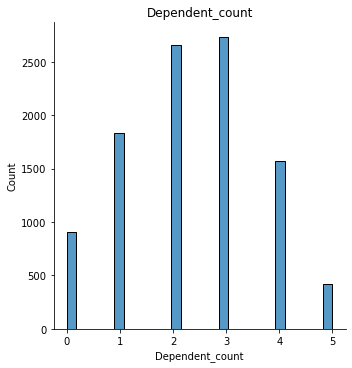

<Figure size 432x288 with 0 Axes>

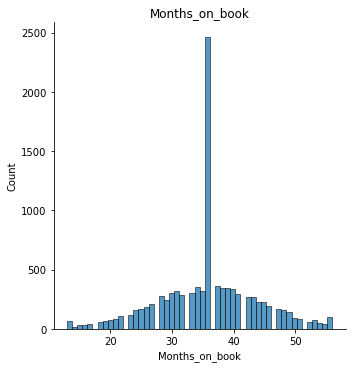

<Figure size 432x288 with 0 Axes>

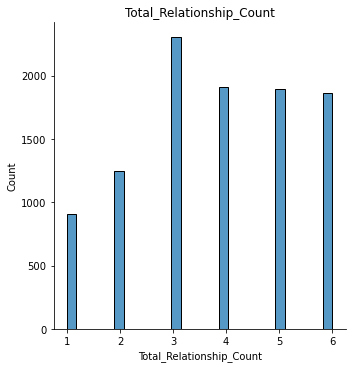

<Figure size 432x288 with 0 Axes>

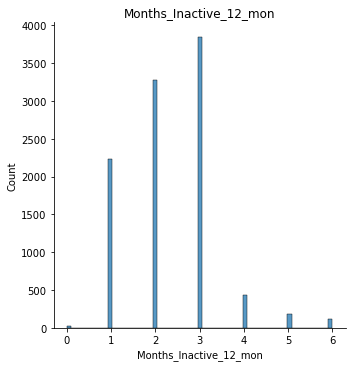

<Figure size 432x288 with 0 Axes>

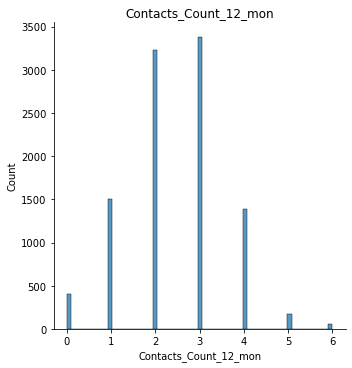

<Figure size 432x288 with 0 Axes>

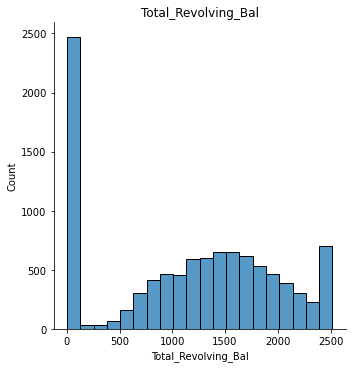

<Figure size 432x288 with 0 Axes>

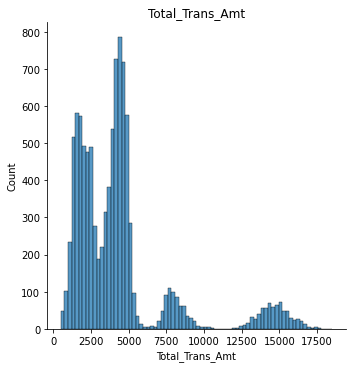

<Figure size 432x288 with 0 Axes>

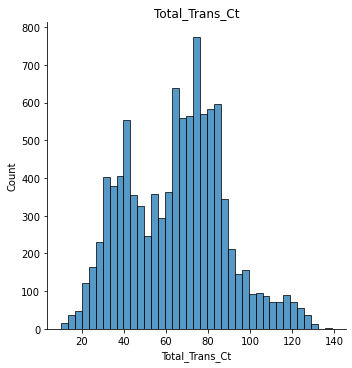

In [16]:
# Plotting the discrete features in the dataset 
discrete_features = df.select_dtypes(['int64']).columns.to_list()

for disc_feature in discrete_features: 
    plt.figure()
    ax = sns.displot(df[disc_feature],kde = False)
    plt.title(disc_feature)

<a id="Data-Preparation"></a>
# 04 Data Preparation
As for most datasets, we will need to process the features before using them to build the model for the customer's churn.

<a id="Data-Discretization"></a>
## 4A Data Discretization
Data Discretization is the process of converting a large amount of data into smaller ones while minimizing the loss of information. <br>
<br>
For our dataset, the <b>age</b> feature ranges from 28 to 73 and that might create skewness in our dataset. We can use binning as a way to categorize the age.

In [17]:
# Create a age feature
df['Age'] = 0

# Categorize the age into bins based on age group of 10s
df.loc[(df['Customer_Age'] > 25)&(df['Customer_Age'] <= 35),'Age'] = 0
df.loc[(df['Customer_Age'] > 35)&(df['Customer_Age'] <= 45),'Age'] = 1
df.loc[(df['Customer_Age'] > 45)&(df['Customer_Age'] <= 55),'Age'] = 2
df.loc[(df['Customer_Age'] > 55)&(df['Customer_Age'] <= 65),'Age'] = 3
df.loc[df['Customer_Age'] > 65,'Age'] = 4
df['Age']=df['Age'].astype(int)

In [18]:
# Remove the column of `Customer_Age`
df.drop(['Customer_Age'],axis = 1,inplace = True)

Text(0.5, 1.0, 'Age')

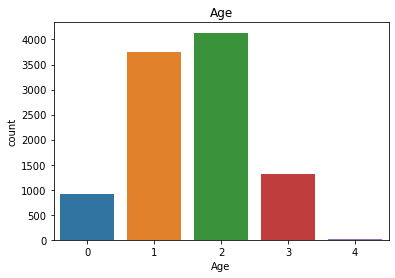

In [19]:
plt.figure()
ax = sns.countplot(x = "Age", data = df)
plt.title("Age")

<a id="Data-Conversion"></a>
## 4B Data Conversion
We will need to convert our features' datatype so that they can be ready for the modeling

In [20]:
# convert bool and object to category 
cat_types = ["bool", "object", "category"]
df_prep = df.copy()

# Prepare dataset by applying `category` data types
df_prep[df_prep.select_dtypes(cat_types).columns] = df_prep.select_dtypes(cat_types).apply(lambda x: x.astype('category'))

In [21]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

<a id="Feature-Encoding"></a>
## 4C Feature Encoding
Feature encoding/dummy coding is the process to convert categorical features/variables into numerical variables for the model.

There are 2 main types of categorical datatypes, the ordinal variables and nominal datas, with the former having "ranking" while order not mattering for the latter.

In [22]:
# Splitting the data into X to store predictor features & Y to store result
flag = {"Existing Customer": 0, "Attrited Customer": 1}
df_prep["Attrition_Flag"] = df_prep["Attrition_Flag"].map(flag)

y = df_prep["Attrition_Flag"]
X = df_prep.drop("Attrition_Flag", errors = "ignore", axis = 1)

In [23]:
# https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python 
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

features_to_encode = X.select_dtypes('category').columns.to_list()
for feature in features_to_encode:
    X = encode_and_bind(X, feature)
    
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CLIENTNUM                       10127 non-null  int64  
 1   Dependent_count                 10127 non-null  int64  
 2   Months_on_book                  10127 non-null  int64  
 3   Total_Relationship_Count        10127 non-null  int64  
 4   Months_Inactive_12_mon          10127 non-null  int64  
 5   Contacts_Count_12_mon           10127 non-null  int64  
 6   Credit_Limit                    10127 non-null  float64
 7   Total_Revolving_Bal             10127 non-null  int64  
 8   Avg_Open_To_Buy                 10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 10  Total_Trans_Amt                 10127 non-null  int64  
 11  Total_Trans_Ct                  10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1             

<a id="Train-Test-Split"></a>
## 4D Train-Test Data Split

In [24]:
# train-test stratified split using 80-20 
X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, test_size = 0.2, 
                                                            random_state = 0, shuffle = True,
                                                            stratify = y)

In [25]:
# Stratified split allows ratio to be consistent
print(y_train80.value_counts())
print(y_test20.value_counts())

0    6799
1    1302
Name: Attrition_Flag, dtype: int64
0    1701
1     325
Name: Attrition_Flag, dtype: int64


<a id="Random-Forest"></a>
# 4 Random Forest Classifier
Since some of our features do have "unknown" variables, the random forest classifer can be a good option approach for our model building. Much of this approach is referenced from Kaggle user: Joseph Chan 2021

Read more: [Random Forest Algorithm](https://www.javatpoint.com/machine-learning-random-forest-algorithm)

In [26]:
# Building model with RFC
RFC = RandomForestClassifier(random_state = 0)
RFC.fit(X_train80, y_train80)

print("Accuracy: %.2f%%" % ((RFC.score(X_test20, y_test20)) * 100.0))

Accuracy: 95.51%


<a id="RFC-Model-Evaluation"></a>
## 4A Model Evaluation
While our model has produced a accurate model of 95.51%, we want to dive deeper to evaluate our model with the [classification report and a confusion matrix](https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/) to understand it better

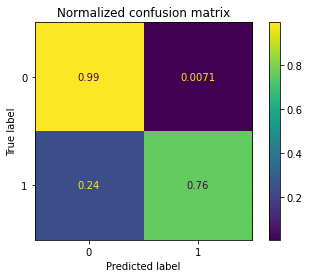

In [27]:
# Confusion Matrix for RFC
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
np.set_printoptions(precision = 2)

# Plot normalized confusion matrix
disp = plot_confusion_matrix(RFC, X_test20, y_test20,
                             display_labels = RFC.classes_,
                             normalize = "true")
disp.ax_.set_title("Normalized confusion matrix")

plt.show()

In [28]:
y_predict = RFC.predict(X_test20)

# Printing classification report
print(classification_report(y_test20, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1701
           1       0.95      0.76      0.84       325

    accuracy                           0.96      2026
   macro avg       0.95      0.87      0.91      2026
weighted avg       0.96      0.96      0.95      2026



In [29]:
print("Recall: %.2f%%" % ((recall_score(y_test20,y_predict)) * 100.0))

Recall: 75.69%


<a id="Conclusion"></a>
# 5 Conclusion

In conclusion, I feel that we have build a decent RFC model that has a high accuracy rate of 96% with a decent but slightly less promising recall rate of 76% which refers to the <b>True Positives</b> rate. Thus, there are definitely ways to further improve the model or find other approaches to improve the performance of the model. 
<p style= "font-family:Georgia;color:#000000;font-size:110%;text-align:center;border-radius:10px 10px;border-style: dotted;border-width:5px;border-color:#323232;"><br>
That said, with this model. The bank can now predict if a customer would likely churn with the data of the past 12-months similar to what we have in this provided dataset. <b>The bank can take stategic preventive measures such as customer outreach or engagement to help avoid the customers from churning and to identify other reasons as to why customers are churning.<br>
    <br></p>
